In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score




ModuleNotFoundError: No module named 'uszipcode'

In [12]:
df = pd.read_csv('housing_outliers_removed.csv')

In [27]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
train

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5843,6068,9528100899,1430179200000000000,827000.0,3,2.50,1850,1330,2.5,0,...,9,1560,290,2004,0,98115,47.6831,-122.325,1810,2071
16546,17212,7284900098,1411516800000000000,705000.0,3,2.50,2820,7200,1.0,0,...,9,1780,1040,1979,0,98177,47.7691,-122.388,2300,7200
17994,18725,3331001285,1420675200000000000,180000.0,3,1.00,1020,5500,1.5,0,...,7,1020,0,1961,0,98118,47.5502,-122.286,1160,5500
20635,21494,2413910120,1404259200000000000,915000.0,3,4.50,3850,62726,2.0,0,...,10,3120,730,2013,0,98053,47.6735,-122.058,2630,46609
17000,17687,7202330530,1421366400000000000,479000.0,3,2.50,1690,3322,2.0,0,...,7,1690,0,2003,0,98053,47.6824,-122.036,1650,3446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,19161,6072500490,1406851200000000000,423800.0,3,2.50,1940,7415,2.0,0,...,8,1940,0,1965,0,98006,47.5420,-122.176,1940,8425
7054,7332,4310700020,1412899200000000000,280000.0,3,1.00,1100,5132,1.0,0,...,6,840,260,1948,0,98103,47.7011,-122.336,1280,5132
18049,18781,8807810110,1400716800000000000,432000.0,3,2.75,2200,14925,1.0,0,...,6,1100,1100,1982,0,98053,47.6606,-122.059,1520,14212
6119,6352,9358002232,1413676800000000000,380000.0,3,2.00,1470,1656,2.0,0,...,8,1310,160,2003,0,98126,47.5653,-122.369,1470,2288


In [29]:
test

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10581,10984,3797700030,1412812800000000000,262500.0,3,1.75,1470,10390,1.0,0,...,7,1470,0,1989,0,98031,47.4192,-122.201,1770,7507
14299,14853,1465400120,1427328000000000000,700000.0,3,2.50,3110,123710,2.0,0,...,8,2430,680,1995,0,98038,47.3879,-122.002,2420,92782
4478,4658,1036400110,1404259200000000000,605000.0,3,2.25,2080,12134,1.0,0,...,8,1530,550,1973,0,98052,47.6315,-122.102,2320,12400
16018,16664,1568100670,1426809600000000000,395900.0,3,1.75,1880,8706,1.0,0,...,7,940,940,1927,0,98155,47.7362,-122.292,1880,7200
18787,19555,3379200100,1400803200000000000,334000.0,4,2.50,2210,6080,1.0,0,...,8,1410,800,1965,0,98178,47.4915,-122.228,2210,6175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,5703,8564600080,1415232000000000000,395000.0,3,2.00,1590,10229,1.0,0,...,7,1590,0,1966,0,98034,47.7239,-122.227,1320,10222
19837,20663,1085621740,1407974400000000000,306000.0,4,2.50,2267,3577,2.0,0,...,7,2267,0,2014,0,98092,47.3384,-122.180,2056,3577
13559,14086,8146200150,1415577600000000000,830000.0,4,2.25,2180,11056,1.0,0,...,8,1370,810,1963,0,98004,47.6042,-122.193,2090,8747
784,818,5014600240,1407974400000000000,682000.0,5,2.75,2760,5000,2.0,0,...,9,2760,0,2005,0,98059,47.5390,-122.188,2870,5030


In [19]:
train.describe()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,16592.000000,1.659200e+04,1.659200e+04,1.659200e+04,16592.000000,16592.000000,16592.000000,1.659200e+04,16592.000000,16592.000000,...,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000
mean,10798.774108,4.584379e+09,1.414578e+18,4.871320e+05,3.331606,2.064519,1995.106256,1.431758e+04,1.477640,0.003255,...,7.556835,1724.773445,270.332811,1970.891574,76.851254,98078.335945,47.557822,-122.213118,1939.588657,12391.071239
std,6235.278524,2.885043e+09,9.768430e+15,2.232397e+05,0.875724,0.716472,794.865303,3.469763e+04,0.535785,0.056958,...,1.065127,743.617415,413.630247,29.235461,384.016060,53.406985,0.140541,0.141736,631.193884,25460.583215
min,2.000000,1.000102e+06,1.398989e+18,7.500000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5391.750000,2.115720e+09,1.405987e+18,3.179375e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,...,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.462075,-122.329000,1470.000000,5076.000000
50%,10781.500000,3.904906e+09,1.413418e+18,4.400000e+05,3.000000,2.250000,1870.000000,7.506500e+03,1.000000,0.000000,...,7.000000,1530.000000,0.000000,1975.000000,0.000000,98065.000000,47.568300,-122.231000,1820.000000,7560.000000
75%,16201.250000,7.335400e+09,1.424153e+18,6.129962e+05,4.000000,2.500000,2460.000000,1.041650e+04,2.000000,0.000000,...,8.000000,2120.000000,520.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2300.000000,9958.500000
max,21610.000000,9.900000e+09,1.432426e+18,1.272500e+06,7.000000,6.750000,7480.000000,1.164794e+06,3.500000,1.000000,...,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16592 entries, 5843 to 18963
Data columns (total 22 columns):
Unnamed: 0       16592 non-null int64
id               16592 non-null int64
date             16592 non-null int64
price            16592 non-null float64
bedrooms         16592 non-null int64
bathrooms        16592 non-null float64
sqft_living      16592 non-null int64
sqft_lot         16592 non-null int64
floors           16592 non-null float64
waterfront       16592 non-null int64
view             16592 non-null int64
condition        16592 non-null int64
grade            16592 non-null int64
sqft_above       16592 non-null int64
sqft_basement    16592 non-null int64
yr_built         16592 non-null int64
yr_renovated     16592 non-null int64
zipcode          16592 non-null int64
lat              16592 non-null float64
long             16592 non-null float64
sqft_living15    16592 non-null int64
sqft_lot15       16592 non-null int64
dtypes: float64(5), int64(17)
memory usage

In [30]:
columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
           'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
           'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [31]:
train_data = df[columns]
train_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20735,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
20736,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
20737,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
20738,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [103]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

lm = sm.OLS(y, X)

model_train = lm.fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2934.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:06:41   Log-Likelihood:            -2.7224e+05
No. Observations:               20740   AIC:                         5.445e+05
Df Residuals:                   20722   BIC:                         5.447e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -2.863e-07   2.98e-07     -0.962      0.336    -8.7e-07    2.97e-07
bedrooms      -1.235e+04   1264.654     -9.763      0.000   -1.48e+04   -9867.774
bathrooms      2.405e+04   2072.438     11.604      0.000       2e+04    2.81e+04
sqft_living      52.3286      1.529     34.218      0.000      49.331      55.326
sqft_lot          0.2122      0.030      7.031      0.000       0.153       0.271
floors         3.544e+04   2231.208     15.886      0.000    3.11e+04    3.98e+04
waterfront     1.479e+05   1.52e+04      9.746      0.000    1.18e+05    1.78e+05
view           3.481e+04   1412.619     24.642      0.000     3.2e+04    3.76e+04
condition       2.66e+04   1435.924     18.526      0.000    2.38e+04    2.94e+04
grade          7.733e+04   1358.936     56.908      0.000    7.47e+04       8e+04
sqft_above       25.4433      1.486     17.121      0.000      22.530      28.356
sqft_basement    26.8853      1.704     15.777      0.000      23.545      30.225
yr_built      -1951.5901     43.020    -45.364      0.000   -2035.914   -1867.267
yr_renovated     15.5653      2.344      6.640      0.000      10.971      20.160
zipcode        -314.0562     10.997    -28.558      0.000    -335.611    -292.501
lat             5.54e+05   6549.930     84.580      0.000    5.41e+05    5.67e+05
long          -6.378e+04   8041.494     -7.931      0.000   -7.95e+04    -4.8e+04
sqft_living15    49.2894      2.234     22.066      0.000      44.911      53.668
sqft_lot15       -0.1730      0.046     -3.753      0.000      -0.263      -0.083
==============================================================================
Omnibus:                     2330.658   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5115.553
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                       4.999   Cond. No.                     3.73e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
print('MSE for train set:', np.sqrt(mean_squared_error(y, model_train.predict(X))))

MSE for train set: 121494.21638727664


In [41]:
model_train.predict(X)

0        268596.919080
1        635853.588552
2        454779.803586
3        429481.499242
4        448406.619927
             ...      
20735    519249.205191
20736    418377.708656
20737    237544.753364
20738    408294.371248
20739    239384.434872
Length: 20740, dtype: float64

In [35]:
test_data = df[columns]
test_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20735,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
20736,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
20737,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
20738,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [100]:
X_1 = test_data.drop(['price'], axis=1)
y_1 = test_data['price']

lm = sm.OLS(y_1, X_1)

model_test = lm.fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2934.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:05:49   Log-Likelihood:            -2.7224e+05
No. Observations:               20740   AIC:                         5.445e+05
Df Residuals:                   20722   BIC:                         5.447e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -2.863e-07   2.98e-07     -0.962      0.336    -8.7e-07    2.97e-07
bedrooms      -1.235e+04   1264.654     -9.763      0.000   -1.48e+04   -9867.774
bathrooms      2.405e+04   2072.438     11.604      0.000       2e+04    2.81e+04
sqft_living      52.3286      1.529     34.218      0.000      49.331      55.326
sqft_lot          0.2122      0.030      7.031      0.000       0.153       0.271
floors         3.544e+04   2231.208     15.886      0.000    3.11e+04    3.98e+04
waterfront     1.479e+05   1.52e+04      9.746      0.000    1.18e+05    1.78e+05
view           3.481e+04   1412.619     24.642      0.000     3.2e+04    3.76e+04
condition       2.66e+04   1435.924     18.526      0.000    2.38e+04    2.94e+04
grade          7.733e+04   1358.936     56.908      0.000    7.47e+04       8e+04
sqft_above       25.4433      1.486     17.121      0.000      22.530      28.356
sqft_basement    26.8853      1.704     15.777      0.000      23.545      30.225
yr_built      -1951.5901     43.020    -45.364      0.000   -2035.914   -1867.267
yr_renovated     15.5653      2.344      6.640      0.000      10.971      20.160
zipcode        -314.0562     10.997    -28.558      0.000    -335.611    -292.501
lat             5.54e+05   6549.930     84.580      0.000    5.41e+05    5.67e+05
long          -6.378e+04   8041.494     -7.931      0.000   -7.95e+04    -4.8e+04
sqft_living15    49.2894      2.234     22.066      0.000      44.911      53.668
sqft_lot15       -0.1730      0.046     -3.753      0.000      -0.263      -0.083
==============================================================================
Omnibus:                     2330.658   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5115.553
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                       4.999   Cond. No.                     3.73e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_1, model_test.predict(X_1))))

MSE for train set: 121494.21638727664


In [48]:
corr = train.corr()

In [56]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [ ]:
plt.style.use('stylename')

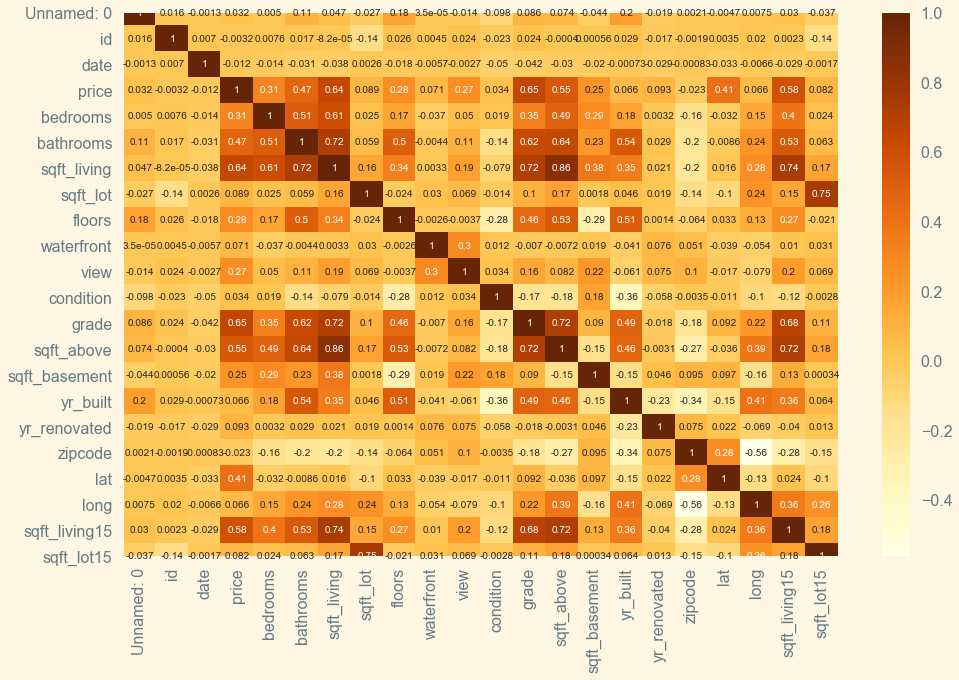

In [120]:

plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='YlOrBr', annot=True)

In [65]:
#checking for coliniar pairs in the test set


co_lin = train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

co_lin['pairs'] = list(zip(co_lin.level_0, co_lin.level_1))

co_lin.set_index(['pairs'], inplace = True)

co_lin.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
co_lin.columns = ['cc']

co_lin.drop_duplicates(inplace=True)

co_lin[(co_lin.cc>.7) & (co_lin.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.857494
"(sqft_lot15, sqft_lot)",0.746206
"(sqft_living, sqft_living15)",0.742902
"(sqft_living15, sqft_above)",0.722897
"(sqft_living, bathrooms)",0.722585
"(grade, sqft_living)",0.718302
"(sqft_above, grade)",0.717765


In [80]:
train.drop(columns=['sqft_above', 'sqft_living', 'sqft_lot15', 'sqft_lot', 'sqft_living15'], inplace=True)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
train_co_lin

,Unnamed: 0,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
5843,6068,9528100899,1430179200000000000,827000.0,3,2.50,2.5,0,0,3,9,290,2004,0,98115,47.6831,-122.325
16546,17212,7284900098,1411516800000000000,705000.0,3,2.50,1.0,0,3,3,9,1040,1979,0,98177,47.7691,-122.388
17994,18725,3331001285,1420675200000000000,180000.0,3,1.00,1.5,0,0,3,7,0,1961,0,98118,47.5502,-122.286
20635,21494,2413910120,1404259200000000000,915000.0,3,4.50,2.0,0,0,3,10,730,2013,0,98053,47.6735,-122.058
17000,17687,7202330530,1421366400000000000,479000.0,3,2.50,2.0,0,0,3,7,0,2003,0,98053,47.6824,-122.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,19161,6072500490,1406851200000000000,423800.0,3,2.50,2.0,0,0,3,8,0,1965,0,98006,47.5420,-122.176
7054,7332,4310700020,1412899200000000000,280000.0,3,1.00,1.0,0,0,3,6,260,1948,0,98103,47.7011,-122.336
18049,18781,8807810110,1400716800000000000,432000.0,3,2.75,1.0,0,0,3,6,1100,1982,0,98053,47.6606,-122.059
6119,6352,9358002232,1413676800000000000,380000.0,3,2.00,2.0,0,0,3,8,160,2003,0,98126,47.5653,-122.369


In [90]:
columns_colin = ['price', 'bedrooms','bathrooms', 'floors', 'waterfront', 'view',
                 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode', 'lat', 'long']


In [91]:
train_data_colin = train[columns_colin]
train_data_colin

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
5843,827000.0,3,2.50,2.5,0,0,3,9,290,2004,0,98115,47.6831,-122.325
16546,705000.0,3,2.50,1.0,0,3,3,9,1040,1979,0,98177,47.7691,-122.388
17994,180000.0,3,1.00,1.5,0,0,3,7,0,1961,0,98118,47.5502,-122.286
20635,915000.0,3,4.50,2.0,0,0,3,10,730,2013,0,98053,47.6735,-122.058
17000,479000.0,3,2.50,2.0,0,0,3,7,0,2003,0,98053,47.6824,-122.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,423800.0,3,2.50,2.0,0,0,3,8,0,1965,0,98006,47.5420,-122.176
7054,280000.0,3,1.00,1.0,0,0,3,6,260,1948,0,98103,47.7011,-122.336
18049,432000.0,3,2.75,1.0,0,0,3,6,1100,1982,0,98053,47.6606,-122.059
6119,380000.0,3,2.00,2.0,0,0,3,8,160,2003,0,98126,47.5653,-122.369


In [93]:
X_2 = train_data_colin.drop(['price'], axis=1)
y_2 = train_data_colin['price']

lm = sm.OLS(y_2, X_2)
model_train_colin = lm.fit()
model_train_colin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          2.069e+04
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:02:51   Log-Likelihood:                     -2.1880e+05
No. Observations:               16592   AIC:                                  4.376e+05
Df Residuals:                   16579   BIC:                                  4.377e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       9642.2944   1382.215      6.976      0.000    6933.005    1.24e+04
bathrooms      5.274e+04   2351.907     22.426      0.000    4.81e+04    5.74e+04
floors         3.613e+04   2595.694     13.921      0.000     3.1e+04    4.12e+04
waterfront     1.637e+05   1.85e+04      8.835      0.000    1.27e+05       2e+05
view           4.231e+04   1649.669     25.648      0.000    3.91e+04    4.55e+04
condition      2.406e+04   1707.193     14.091      0.000    2.07e+04    2.74e+04
grade          1.189e+05   1297.073     91.683      0.000    1.16e+05    1.21e+05
sqft_basement    34.5547      3.046     11.343      0.000      28.584      40.526
yr_built      -2130.9558     50.751    -41.989      0.000   -2230.432   -2031.479
yr_renovated     12.1875      2.784      4.378      0.000       6.731      17.644
zipcode        -150.8141     12.359    -12.203      0.000    -175.038    -126.590
lat             5.36e+05   7699.960     69.617      0.000    5.21e+05    5.51e+05
long           5.898e+04   9043.332      6.522      0.000    4.13e+04    7.67e+04
==============================================================================
Omnibus:                     2080.549   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4358.924
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                       4.973   Cond. No.                     1.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_2, model_train_colin.predict(X_2))))

MSE for train set: 129105.68199875347


In [105]:
train

,Unnamed: 0,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
5843,6068,9528100899,1430179200000000000,827000.0,3,2.50,2.5,0,0,3,9,290,2004,0,98115,47.6831,-122.325
16546,17212,7284900098,1411516800000000000,705000.0,3,2.50,1.0,0,3,3,9,1040,1979,0,98177,47.7691,-122.388
17994,18725,3331001285,1420675200000000000,180000.0,3,1.00,1.5,0,0,3,7,0,1961,0,98118,47.5502,-122.286
20635,21494,2413910120,1404259200000000000,915000.0,3,4.50,2.0,0,0,3,10,730,2013,0,98053,47.6735,-122.058
17000,17687,7202330530,1421366400000000000,479000.0,3,2.50,2.0,0,0,3,7,0,2003,0,98053,47.6824,-122.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,19161,6072500490,1406851200000000000,423800.0,3,2.50,2.0,0,0,3,8,0,1965,0,98006,47.5420,-122.176
7054,7332,4310700020,1412899200000000000,280000.0,3,1.00,1.0,0,0,3,6,260,1948,0,98103,47.7011,-122.336
18049,18781,8807810110,1400716800000000000,432000.0,3,2.75,1.0,0,0,3,6,1100,1982,0,98053,47.6606,-122.059
6119,6352,9358002232,1413676800000000000,380000.0,3,2.00,2.0,0,0,3,8,160,2003,0,98126,47.5653,-122.369


In [107]:
train.drop(columns=['id', 'date'], inplace=True)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
train

,Unnamed: 0,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
5843,6068,827000.0,3,2.50,2.5,0,0,3,9,290,2004,0,98115,47.6831,-122.325
16546,17212,705000.0,3,2.50,1.0,0,3,3,9,1040,1979,0,98177,47.7691,-122.388
17994,18725,180000.0,3,1.00,1.5,0,0,3,7,0,1961,0,98118,47.5502,-122.286
20635,21494,915000.0,3,4.50,2.0,0,0,3,10,730,2013,0,98053,47.6735,-122.058
17000,17687,479000.0,3,2.50,2.0,0,0,3,7,0,2003,0,98053,47.6824,-122.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,19161,423800.0,3,2.50,2.0,0,0,3,8,0,1965,0,98006,47.5420,-122.176
7054,7332,280000.0,3,1.00,1.0,0,0,3,6,260,1948,0,98103,47.7011,-122.336
18049,18781,432000.0,3,2.75,1.0,0,0,3,6,1100,1982,0,98053,47.6606,-122.059
6119,6352,380000.0,3,2.00,2.0,0,0,3,8,160,2003,0,98126,47.5653,-122.369


In [114]:
#Binning Zipcodes
zipcode_prices = train.groupby('zipcode')['price'].mean().reset_index()

In [116]:
zipcode_prices

,zipcode,price
0,98001,283939.339041
1,98002,233765.095541
2,98003,297486.934498
3,98004,876079.351145
4,98005,773412.492647
...,...,...
65,98177,584280.194737
66,98178,305965.338028
67,98188,294623.750000
68,98198,300694.622222


5843     NaN
16546    NaN
17994    NaN
20635    NaN
17000    NaN
        ... 
18413    NaN
7054     NaN
18049    NaN
6119     NaN
18963    NaN
Name: zipcode, Length: 16592, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [144]:
train

,Unnamed: 0,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
5843,6068,827000.0,3,2.50,2.5,0,0,3,9,290,2004,0,98115,47.6831,-122.325
16546,17212,705000.0,3,2.50,1.0,0,3,3,9,1040,1979,0,98177,47.7691,-122.388
17994,18725,180000.0,3,1.00,1.5,0,0,3,7,0,1961,0,98118,47.5502,-122.286
20635,21494,915000.0,3,4.50,2.0,0,0,3,10,730,2013,0,98053,47.6735,-122.058
17000,17687,479000.0,3,2.50,2.0,0,0,3,7,0,2003,0,98053,47.6824,-122.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,19161,423800.0,3,2.50,2.0,0,0,3,8,0,1965,0,98006,47.5420,-122.176
7054,7332,280000.0,3,1.00,1.0,0,0,3,6,260,1948,0,98103,47.7011,-122.336
18049,18781,432000.0,3,2.75,1.0,0,0,3,6,1100,1982,0,98053,47.6606,-122.059
6119,6352,380000.0,3,2.00,2.0,0,0,3,8,160,2003,0,98126,47.5653,-122.369


In [139]:
high_corr = train.corr()['price'].sort_values(ascending=False)
high_corr

price            1.000000
grade            0.648802
bathrooms        0.467933
lat              0.414950
bedrooms         0.311374
floors           0.275626
view             0.271931
sqft_basement    0.245970
yr_renovated     0.092603
waterfront       0.070956
long             0.066275
yr_built         0.065637
condition        0.033833
Unnamed: 0       0.032083
zipcode         -0.022691
Name: price, dtype: float64

In [155]:
train

,Unnamed: 0,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
5843,6068,827000.0,3,2.50,2.5,0,0,3,9,290,2004,0,98115,47.6831,-122.325
16546,17212,705000.0,3,2.50,1.0,0,3,3,9,1040,1979,0,98177,47.7691,-122.388
17994,18725,180000.0,3,1.00,1.5,0,0,3,7,0,1961,0,98118,47.5502,-122.286
20635,21494,915000.0,3,4.50,2.0,0,0,3,10,730,2013,0,98053,47.6735,-122.058
17000,17687,479000.0,3,2.50,2.0,0,0,3,7,0,2003,0,98053,47.6824,-122.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,19161,423800.0,3,2.50,2.0,0,0,3,8,0,1965,0,98006,47.5420,-122.176
7054,7332,280000.0,3,1.00,1.0,0,0,3,6,260,1948,0,98103,47.7011,-122.336
18049,18781,432000.0,3,2.75,1.0,0,0,3,6,1100,1982,0,98053,47.6606,-122.059
6119,6352,380000.0,3,2.00,2.0,0,0,3,8,160,2003,0,98126,47.5653,-122.369
